# Evolution of urban patterns: urban morphology as an open reproducible data science

## Plot maps

This is the third notebook in a sequence of three. The notebook plots maps of case studies.

It requires `data/case_studies.csv` input with origins of case studies and data generated by the first notebook.

Date: February 5, 2021

In [1]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import glob
import pathlib
from palettable.wesanderson import Moonrise5_6

In [32]:
files = glob.glob("data/*gpkg")
cases = pd.read_csv("data/case_studies.csv")
cases = cases.set_index("case")

In [3]:
%%capture --no-stdout

for f in files:
    tessellation = gpd.read_file(f, layer="tessellation")
    buildings = gpd.read_file(f, layer="buildings")
    edges = gpd.read_file(f, layer="edges")
    nodes = gpd.read_file(f, layer="nodes")
    case = pathlib.Path(f).stem
    coords = cases.origin.loc[case]
    buffer = gpd.GeoSeries([Point(tuple(map(float, coords[1:-1].split(', '))))], crs=4326).to_crs(tessellation.crs).buffer(400)
    ax = gpd.clip(buildings, buffer).plot(zorder=1, color=Moonrise5_6.hex_colors[3], figsize=(12, 12))
    buildings.plot(ax=ax, zorder=0, color=Moonrise5_6.hex_colors[3], alpha=.2)
    buffer.plot(ax=ax, facecolor="none", edgecolor=Moonrise5_6.hex_colors[4], linewidth=2)
    ax.set_axis_off()
    ax.set_title(case)
    b = buffer.total_bounds
    ax.set_xlim(b[0]-20, b[2]+20)
    ax.set_ylim(b[1]-20, b[3]+20)
    plt.savefig(f"figures/{case}.png", bbox_inches="tight")
    plt.close("all")

In [40]:
sample = [
    'data/Kyoto.gpkg',
    'data/Chicago.gpkg',
    'data/Frohnau.gpkg',
    'data/Brasilia.gpkg',
    'data/Miami Lakes.gpkg',
    'data/Tandale.gpkg',
]
periods = [
    "pre-industrial",
    "industrial",
    "garden city",
    "modernist",
    "neo-traditional",
    "informal"
]

In [42]:
%%capture --no-stdout

fig, axs = plt.subplots(2, 3, figsize=(8, 6))

for i, ax in enumerate(axs.flatten()):
    f = sample[i]
    tessellation = gpd.read_file(f, layer="tessellation")
    buildings = gpd.read_file(f, layer="buildings")
    edges = gpd.read_file(f, layer="edges")
    nodes = gpd.read_file(f, layer="nodes")
    case = pathlib.Path(f).stem
    coords = cases.origin.loc[case]
    buffer = gpd.GeoSeries([Point(tuple(map(float, coords[1:-1].split(', '))))], crs=4326).to_crs(tessellation.crs).buffer(400)
    gpd.clip(buildings, buffer).plot(zorder=1, color=Moonrise5_6.hex_colors[3], ax=ax)
    buildings.plot(ax=ax, zorder=0, color=Moonrise5_6.hex_colors[3], alpha=.2)
    buffer.plot(ax=ax, facecolor="none", edgecolor=Moonrise5_6.hex_colors[4], linewidth=.5)
    ax.set_axis_off()
    ax.set_title(case + f"\n({periods[i]})", fontsize=7)
    b = buffer.total_bounds
    ax.set_xlim(b[0]-20, b[2]+20)
    ax.set_ylim(b[1]-20, b[3]+20)

plt.savefig(f"figures/case_illustrations.png", bbox_inches="tight", dpi=300)

In [43]:
%%capture --no-stdout

fig, axs = plt.subplots(2, 3, figsize=(8, 6))

for i, ax in enumerate(axs.flatten()):
    f = sample[i]
    tessellation = gpd.read_file(f, layer="tessellation")
    buildings = gpd.read_file(f, layer="buildings")
    case = pathlib.Path(f).stem
    coords = cases.origin.loc[case]
    buffer = gpd.GeoSeries([Point(tuple(map(float, coords[1:-1].split(', '))))], crs=4326).to_crs(tessellation.crs).buffer(400)
    gpd.clip(tessellation, buffer).boundary.plot(zorder=1, color=Moonrise5_6.hex_colors[3], figsize=(3, 3), linewidth=.2, ax=ax)
    buildings.plot(ax=ax, zorder=0, color=Moonrise5_6.hex_colors[0], alpha=.2)
    buffer.plot(ax=ax, facecolor="none", edgecolor=Moonrise5_6.hex_colors[4], linewidth=.5)
    ax.set_axis_off()
    ax.set_title(case + f"\n({periods[i]})", fontsize=7)
    b = buffer.total_bounds
    ax.set_xlim(b[0]-20, b[2]+20)
    ax.set_ylim(b[1]-20, b[3]+20)

plt.savefig(f"figures/tessellation_illustrations.png", bbox_inches="tight", dpi=300)

In [33]:
cases["origin"] = cases.origin.apply(lambda coords: Point(tuple(map(float, coords[1:-1].split(', ')))))
cases = gpd.GeoDataFrame(cases, geometry="origin", crs=4326).to_crs("+proj=robin")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).dissolve().to_crs("+proj=robin")

In [53]:
symbology = {"pre-industrial": Moonrise5_6.hex_colors[0],
             "industrial": Moonrise5_6.hex_colors[1],
             "garden city": Moonrise5_6.hex_colors[2],
             "modernist": Moonrise5_6.hex_colors[3],
             "neo-traditional": Moonrise5_6.hex_colors[4],
             "informal": Moonrise5_6.hex_colors[5],
            }

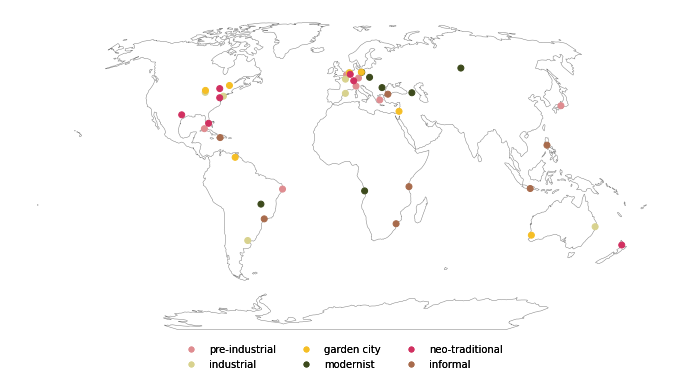

In [56]:
ax = world.plot(figsize=(12, 8), color="none", edgecolor="grey", linewidth=.5)
cases.plot(ax=ax, color=cases.period.map(symbology))
ax.set_axis_off()

# add manual legend
from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax.legend(custom_points, symbology.keys(), ncol=3, loc="lower center", frameon=False, bbox_to_anchor=(0.5, -.1))
ax.add_artist(leg_points)
plt.savefig('figures/case_studies.png', bbox_inches='tight', dpi=300)